# 1- Perkenalan / Introduction

```
Nama        : Rio Ardiarta Makhiyyuddin

Data        : [Data] ('loan_approval_dataset.csv')

Objective   :  Project ini menentukan untuk konsumen yang melakukan permohonan untuk pinjaman, apakah konsumen tersebut memenuhi syarat apakah tidak memenuhi syarat.

```

# 2- Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install phik
!pip install feature_engine
!pip install -U imbalanced-learn

# Define Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

# For Outlier Handling
from feature_engine.outliers import Winsorizer
from scipy.stats import mstats

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OneHotEncoder

# Evaluate Models
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy import stats
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer

# Import Classificaition Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


# 3- Data Loading

In [3]:
# Load dataset csv
# df_ori = pd.read_csv ('loan_approval_dataset.csv')

df_ori = pd.read_csv ('/content/drive/MyDrive/loan_approval_dataset.csv')

In [4]:
# Copy dataframe
df = df_ori.copy()

In [5]:
# Cek 10 dari atas
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [6]:
# Cek 10 dari bawah
df.tail(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4259,4260,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
4260,4261,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved
4262,4263,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
4263,4264,3,Graduate,No,5000000,12700000,14,865,4700000,8100000,19500000,6300000,Approved
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [7]:
# Cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Tidak terdapat missing value pada dataset diatas, dari total baris berjumlah 4269 dan 13 kolom. Dengan tipe dataset 10 integer dan 3 object, untuk memory usage sebesar 433.7+ KB

In [8]:
# Cek Duplikat
df.duplicated().sum()

0

In [9]:
# Cek number unique pada kolom
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [10]:
# Cek kolom
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

Pada kolom diatas terdapat white space yang cukup banyak pada setiap kolom.

In [11]:
# Cek jumlah data
df.shape

(4269, 13)

Terdapat 4269 baris dan 13 kolom

In [12]:
# Cek nilai nul
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

Tidak terdapat nilai null pada semua kolom.

In [13]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,4259,4260,4261,4262,4263,4264,4265,4266,4267,4268
loan_id,1,2,3,4,5,6,7,8,9,10,...,4260,4261,4262,4263,4264,4265,4266,4267,4268,4269
no_of_dependents,2,0,3,3,5,0,5,2,0,5,...,0,5,3,5,3,5,0,2,1,1
education,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Not Graduate,...,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Not Graduate,Not Graduate,Not Graduate,Graduate
self_employed,No,Yes,No,No,Yes,Yes,No,Yes,Yes,No,...,Yes,No,Yes,No,No,Yes,Yes,No,No,No
income_annum,9600000,4100000,9100000,8200000,9800000,4800000,8700000,5700000,800000,1100000,...,4500000,8800000,3000000,1300000,5000000,1000000,3300000,6500000,4100000,9200000
loan_amount,29900000,12200000,29700000,30700000,24200000,13500000,33000000,15000000,2200000,4300000,...,11500000,29300000,7500000,3000000,12700000,2300000,11300000,23900000,12800000,29700000
loan_term,12,8,20,8,20,10,4,20,20,10,...,14,10,6,20,14,12,20,18,8,10
cibil_score,778,417,506,467,382,319,678,382,782,388,...,509,560,881,540,865,317,559,457,780,607
residential_assets_value,2400000,2700000,7100000,18200000,12400000,6800000,22500000,13200000,1300000,3200000,...,13400000,16800000,1400000,1000000,4700000,2800000,4200000,1200000,8200000,17800000
commercial_assets_value,17600000,2200000,4500000,3300000,8200000,8300000,14800000,5700000,800000,1400000,...,2300000,13900000,4500000,2300000,8100000,500000,2900000,12400000,700000,11800000


## 3.1- Handling data

In [14]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [15]:
# Tampilkan kolom unik di Unique
df[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [16]:
# Tampilkan kolom unik di Unique
df[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [17]:
# Tampilkan kolom unik di Unique
df[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [18]:
# Hapus spasi pada kolom
df.columns = df.columns.str.strip()

In [19]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [20]:
# Hapus spasi pada baris
df['education'] = df['education'].str.strip()

In [21]:
df['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [22]:
# Hapus spasi pada baris
df['self_employed'] = df['self_employed'].str.strip()

In [23]:
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
# Hapus spasi pada baris
df['loan_status'] = df['loan_status'].str.strip()

In [25]:
df['loan_status'].unique()

array(['Approved', 'Rejected'], dtype=object)

In [26]:
# Cek Statistik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


## 3.2- Conclusion

**Statement**

- Setelah dilakukan handling pada white space dihilangkan pada kolom, terus setelah dicek unique value pada kolom juga terdapat didalam kolom tersebut. Maka akan dihilangkan juga sama dengan kolom.
- Tidak terdapat missing value pada data diatas, dengan jumlah data 4269 baris dan 13 kolom.
- Nilai minimal pada loan_ammount sebesar 300000 dan untuk nilai maksimalnya sebesar 39500000.

# 4- Exploratory Data Analysis (EDA)

interval columns not set, guessing: ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


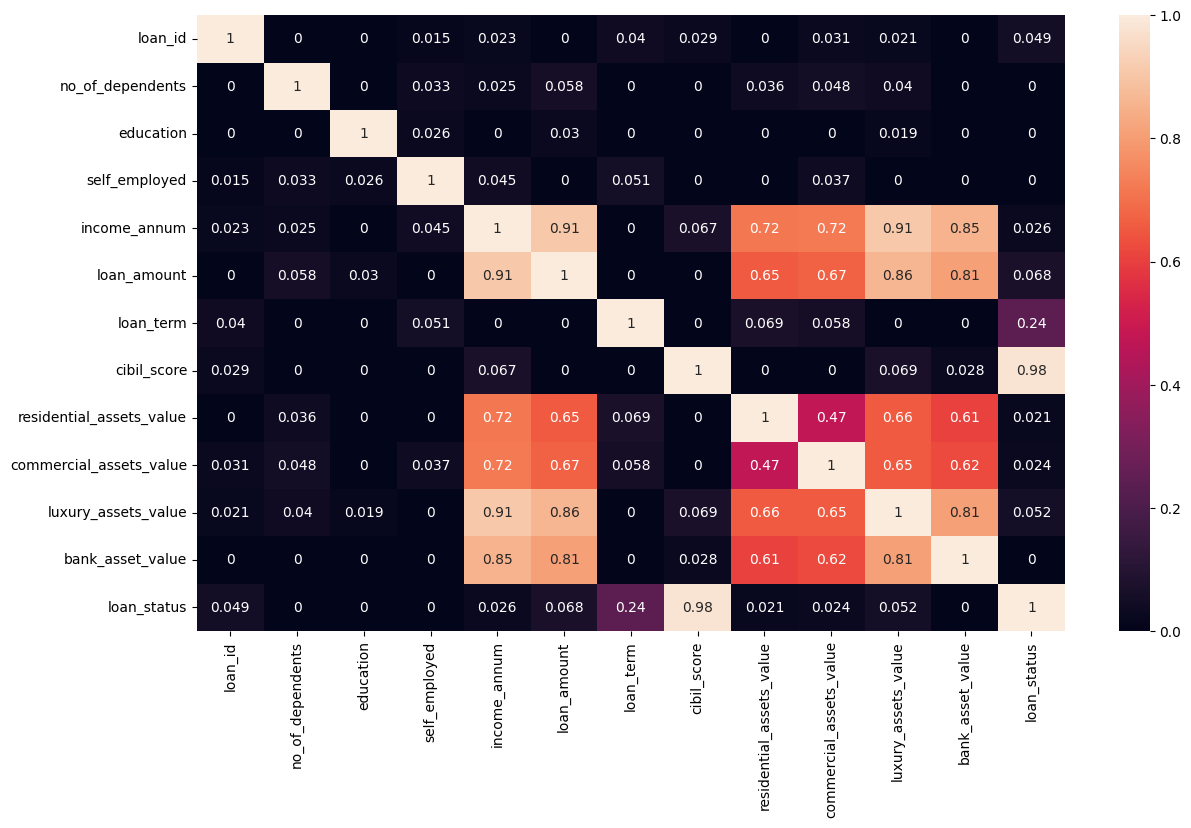

In [27]:
# Tampilkan visualisasi untuk korelasi
corr = df.phik_matrix()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True)
plt.show()

**Statement**

Dari visualisasi diatas, untuk nilai korelasi tertinggi adalah :

  - loan_status vs cibil_score : 0.98
  - loan_amount vs income_annum : 0.91
  - luxury_assets_value vs income_annum : 0.91

Dari korelasi tertinggi, semuanya terdapat pada kolom asset yang memiliki korelasi dengan pendapatan dan jumlah pinjaman. Tapi karena dari semua kolom yang ada akan diambil yang memiliki korelasi tinggi terhadap target, maka yang akan kita ambil sebegai berikut

  - loan_status vs cibil_score : 0.98
  - loan_status vs loan_term : 0.24
  - loan_status vs loan_amount : 0.068

## 4.1- Numerical

Text(0.5, 1.0, 'Scatterplot Cibil Score dan Loan Amount dengan Loan Status')

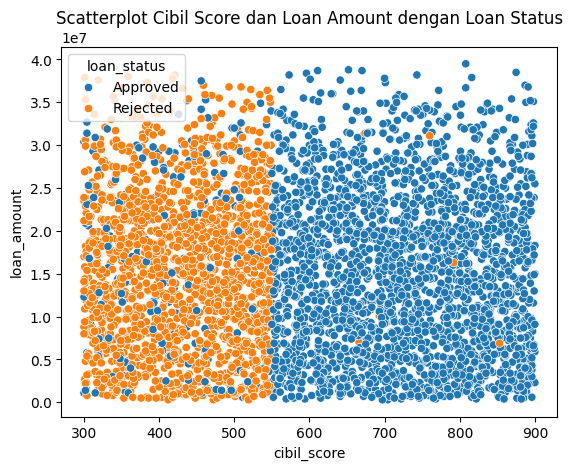

In [28]:
# Scatterplot antara cibil_score dan loan_amount dengan loan_status
sns.scatterplot(data=df, x='cibil_score', y='loan_amount', hue='loan_status')
plt.title('Scatterplot Cibil Score dan Loan Amount dengan Loan Status')

**Statement**

Dari visualisasi diatas dapat disimpulkan hampir seluruh pemohon disetujui bila mempunyai nilai kredit diatas 540. Meskipun sebagian besar pemohon mempunyai nilai kredit dibawah 540 ditolak. Hal ini dapat dipengaruhi oleh nilai aset, yang dapat memberikan jaminan kepada lembaga pemberi pinjaman jika pemohon tidak dapat melunasi pinjamannya kembali.

<function matplotlib.pyplot.show(close=None, block=None)>

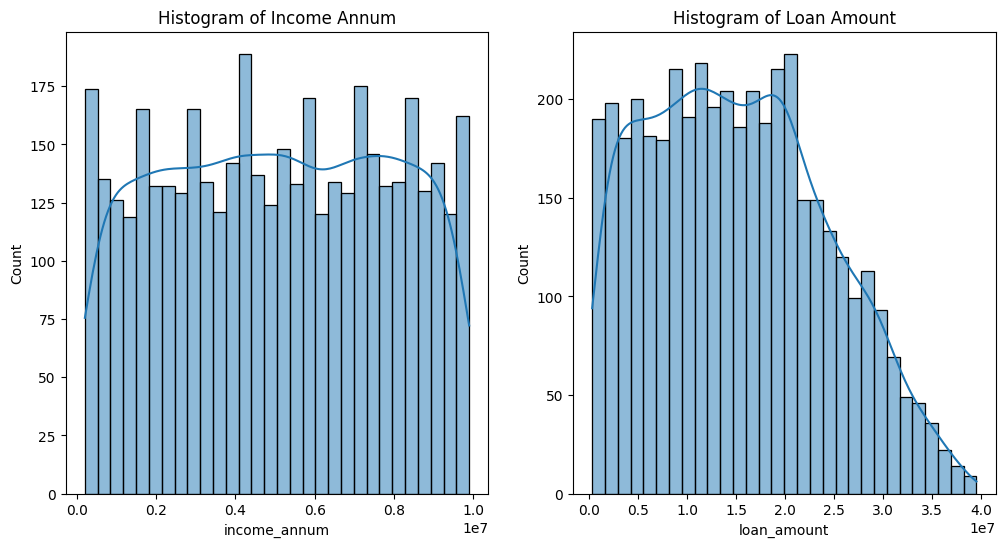

In [29]:
# Create Histogram
plt.figure(figsize=(12, 6))

# Histplot 1 untuk income_annum
plt.subplot(1, 2, 1)
sns.histplot(df['income_annum'], kde=True, bins=30)
plt.title('Histogram of Income Annum')

# Histplot 2 untuk loan_amount
plt.subplot(1, 2, 2)
sns.histplot(df['loan_amount'], kde=True, bins=30)
plt.title('Histogram of Loan Amount')

# Tampilkan Histplot
plt.show

**Statement**

`income_annum` tampaknya memiliki distribusi yang merata, sedangkan pada `loan_amount` tampaknya memiliki distribusi yang tidak terlalu merata karena terjadi penurunan drastis yan mengakibatkan kemiringan ke kanan.

### Loan Term dan Cibil Score

<function matplotlib.pyplot.show(close=None, block=None)>

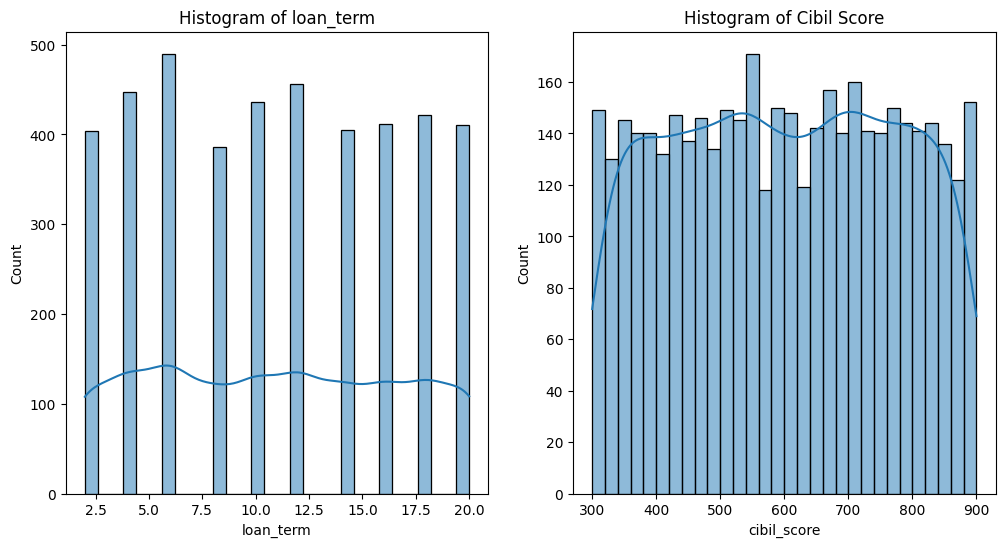

In [30]:
# Create Histogram
plt.figure(figsize=(12, 6))

# Histplot 1 untuk loan_term
plt.subplot(1, 2, 1)
sns.histplot(df['loan_term'], kde=True, bins=30)
plt.title('Histogram of loan_term')

# Histplot 2 untuk cibil_score
plt.subplot(1, 2, 2)
sns.histplot(df['cibil_score'], kde=True, bins=30)
plt.title('Histogram of Cibil Score')

# Tampilkan Histplot
plt.show

**Statement**

Dari visualisasi diatas, antara `loan_term` dan `cibil_score` memiliki distribusi yang sama meratanya, dengan jumlah diatas 350 untuk semua `loan_term` dan jumlah diatas 100 untuk semua `cibil_score`

### Count by Loan Status

Text(0.5, 1.0, 'Pie Chart of Loan Status')

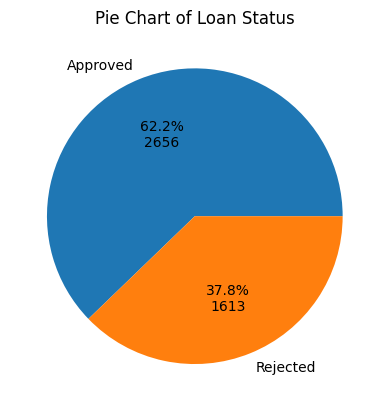

In [31]:
# Pie chart for loan_status
loan_sum = df['loan_status'].value_counts().values.sum()
def fmt(x):
  return '{:.1f}%\n{:.0f}'.format(x, loan_sum*x/100)
plt.pie(df['loan_status'].value_counts().values, labels=df['loan_status'].value_counts().index, autopct=fmt)
plt.title('Pie Chart of Loan Status')

**Statement**

Dari visualisasi diatas terlihat, bahwa pemohon yang disetujui sebesar 62.2% / 2656, sedangkan untuk pemohon yang tidak disetujui sebesar 37.8% / 1613.

Text(0.5, 1.0, 'Pie Chart of self_employed')

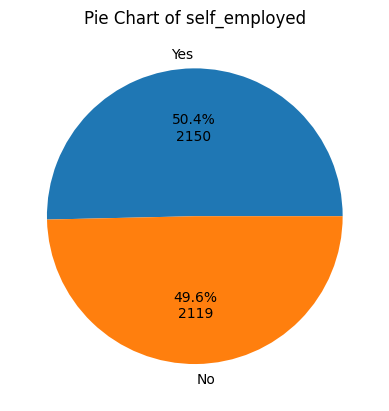

In [32]:
# Pie chart for 'self_employed'
loan_total = df['self_employed'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, loan_total*x/100)
plt.pie(df['self_employed'].value_counts().values, labels=df['self_employed'].value_counts().index, autopct=fmt)
plt.title('Pie Chart of self_employed')

Dari diagram lingkaran `self_employed`, terdapat perbedaan 50.4% dan 49.6% antara mereka yang bekerja dan mereka yang tidak bekerja. Tampaknya hal itu tidak menjadi faktor besar dalam persetujuan pinjaman.

Text(0.5, 1.0, 'Pie Chart of education')

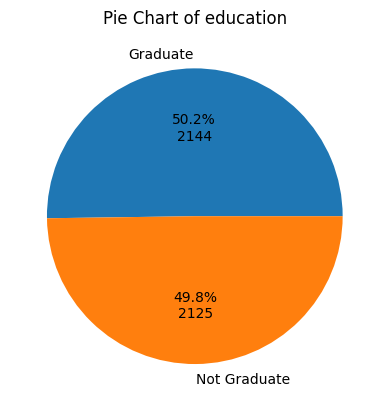

In [33]:
# Pie chart for 'education'
loan_total = df['education'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, loan_total*x/100)
plt.pie(df['education'].value_counts().values, labels=df['education'].value_counts().index, autopct=fmt)
plt.title('Pie Chart of education')

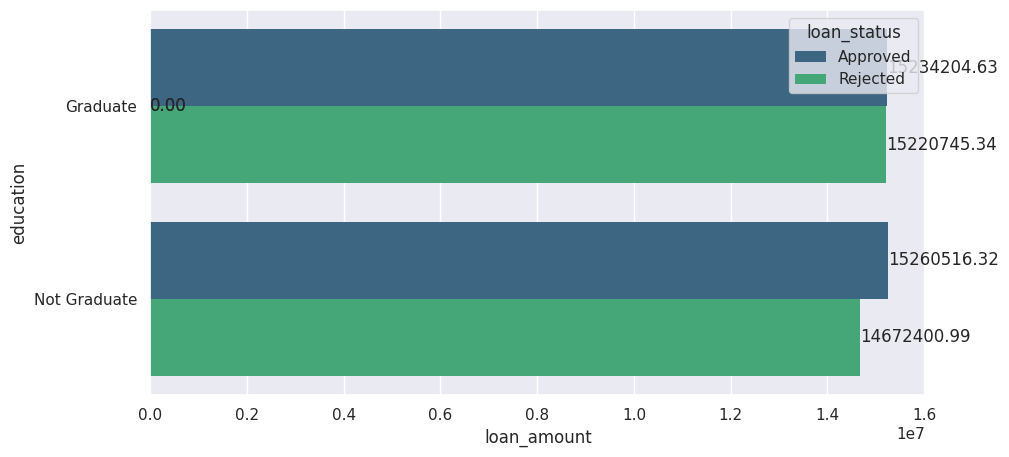

In [34]:
# Tampilkan barplot
sns.set(rc={'figure.figsize':(10,5)})

bars = sns.barplot(y='education', x='loan_amount', data=df, hue='loan_status', palette= 'viridis', ci=None, edgecolor='None')

# Untuk menampilkan nilai pada ujung bar
for p in bars.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center')

plt.show()


## 4.2- Categorical

### 4.2.1- Nominal

<function matplotlib.pyplot.show(close=None, block=None)>

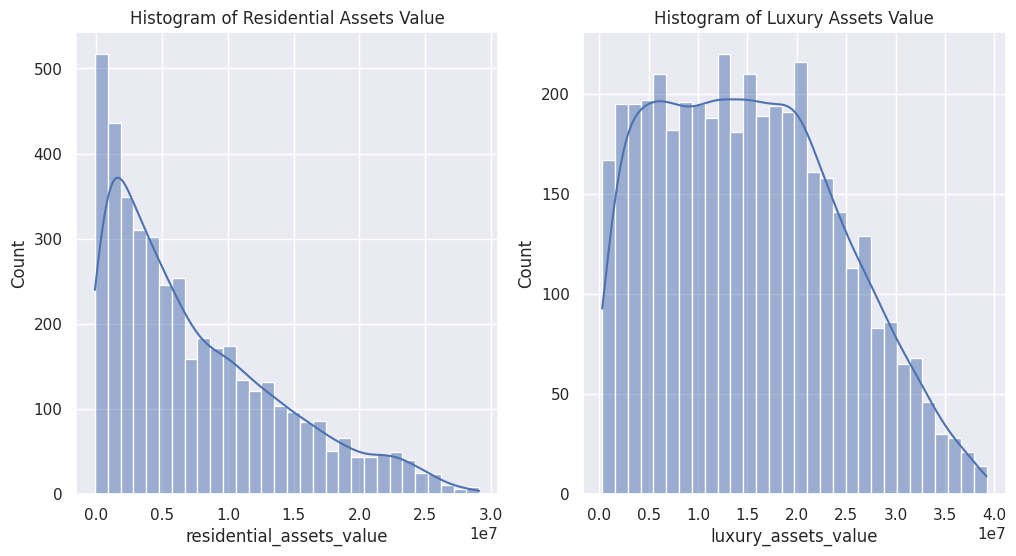

In [35]:
# Create Histogram
plt.figure(figsize=(12, 6))

# Histplot 1 untuk Residential Assets Value
plt.subplot(1, 2, 1)
sns.histplot(df['residential_assets_value'], kde=True, bins=30)
plt.title('Histogram of Residential Assets Value')

# Histplot 2 untuk Luxury Assets Value
plt.subplot(1, 2, 2)
sns.histplot(df['luxury_assets_value'], kde=True, bins=30)
plt.title('Histogram of Luxury Assets Value')

# Tampilkan Histplot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

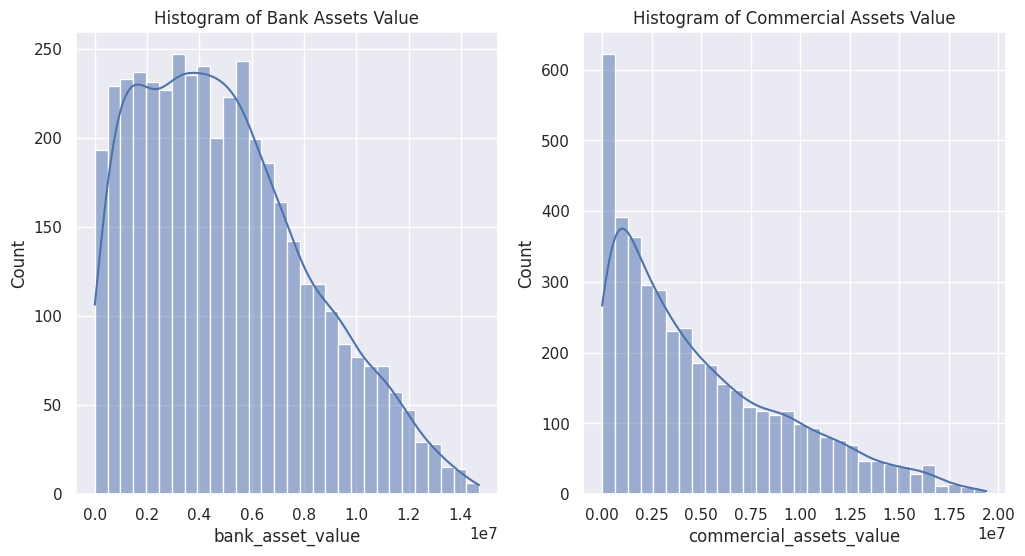

In [36]:
# Create Histogram
plt.figure(figsize=(12, 6))

# Histplot 1 untuk Bank Assets Value
plt.subplot(1, 2, 1)
sns.histplot(df['bank_asset_value'], kde=True, bins=30)
plt.title('Histogram of Bank Assets Value')

# Histplot 2 untuk Commercial Assets Value
plt.subplot(1, 2, 2)
sns.histplot(df['commercial_assets_value'], kde=True, bins=30)
plt.title('Histogram of Commercial Assets Value')

# Tampilkan Histplot
plt.show

**Statement**

Dari visualisasi diatas, bahwa untuk semua yang berhubungan dengan assets memiliki kemiringan ke kanan.

In [37]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [38]:
# Membuat kolom baru untuk semua aset
df['total_asset'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_asset
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000


**Statement**

Dari data diatas yang kita ambil merupakan semua yang berhubungan dengan asset, maka kita jadikan satu untuk semua asset yang memiliki korelasi paling tinggi. Dan akan kita buat kan kolom baru untuk dijadikan acuan dalam meilihat ptensi pemohon yang ingin melakukan pinjaman.

In [39]:
# Create new column if assets are higher than loan amount
new = []

for i, j in df['total_asset'].items():
    if j > df.iat[i, 5]:
        new.append('Syarat Terpenuhi')
    else:
        new.append('Syarat Tidak Terpenuhi')

df['condition'] = new
df['condition'].value_counts()

Syarat Terpenuhi          4240
Syarat Tidak Terpenuhi      29
Name: condition, dtype: int64

# 5- Feature Engineering

interval columns not set, guessing: ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'total_asset']


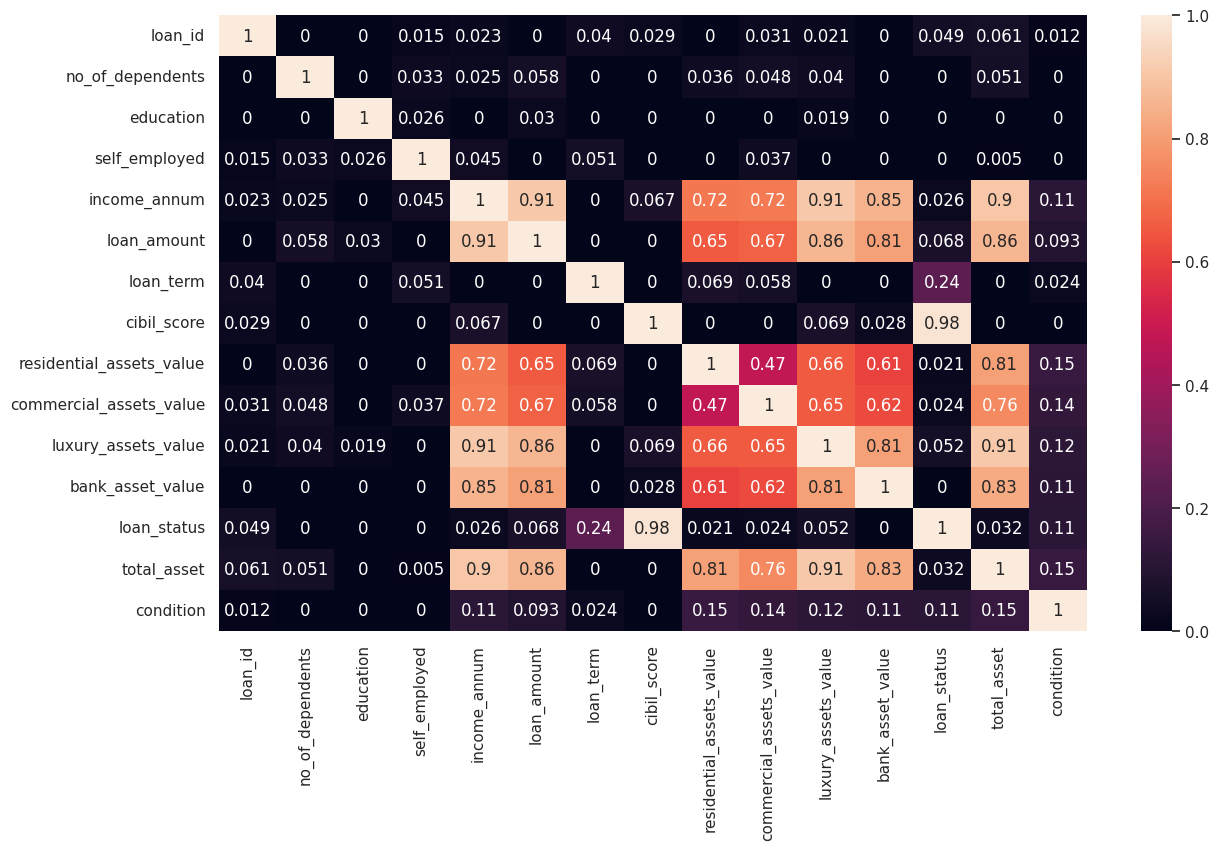

In [40]:
# Tampilkan visualisasi untuk korelasi
corr = df.phik_matrix()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True)
plt.show()

**Statement**

Dari visualisasi diatas, variabel yang berkorelasi tinggi dengan `loan_status` adalah:

- cibil_score = 0,98
- loan_term = 0,24  
- condition = 0,11

Hanya dua kolom ini yang nilainya cukup tinggi untuk korelasi, jadi hanya dua kolom ini yang akan digunakan untuk pemilihan fitur nanti. Namun pada bagian EDA terlihat bahwa jika `total_asset` lebih tinggi dari `loan_amount`, kemungkinan pinjaman disetujui sangat besar.

## 5.1- Split Features (X) dan target (y)

In [41]:
# Split between Feature (X) and Target (y)
X = df.drop(['loan_status'], axis=1)
y = df.loan_status

X.head(3)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_asset,condition
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,50700000,Syarat Terpenuhi
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,17000000,Syarat Terpenuhi
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,57700000,Syarat Terpenuhi


## 5.2- Split Train and Test set

In [42]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (3415, 14)
Test size  :  (854, 14)


## 5.3- Handling Outlier

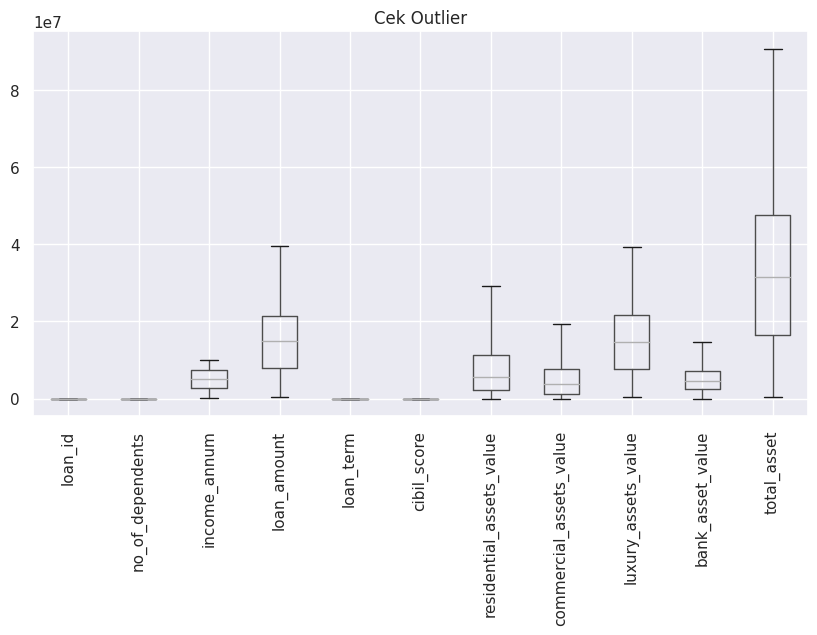

In [43]:
# boxplot untuk melihat outlier
plt.figure(figsize=(10,5))
X_train.boxplot(rot=90, whis=3)
plt.title('Cek Outlier')
plt.show()

In [44]:
# Cek pembagian distribusi skew dan normal

dist_cek = X_train.skew(numeric_only=True)

normal = []
skew = []

for i in range(len(dist_cek)):
    if dist_cek.values[i] < -0.5:
        skew.append(dist_cek.index[i])
    elif dist_cek.values[i] > 0.5:
        skew.append(dist_cek.index[i])
    else:
        normal.append(dist_cek.index[i])

print('Kolom Skew Distribution:', skew)
print('Kolom Normal Distribusi', normal)

Kolom Skew Distribution: ['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']
Kolom Normal Distribusi ['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'luxury_assets_value', 'total_asset']


### 5.2.1- Drop Kolom

In [45]:
# Drop kolom di X_test
X_test = X_test.drop(['loan_id', 'no_of_dependents', 'education', 'self_employed'], axis=1)

In [46]:
# Drop kolom di X_train
X_train = X_train.drop(['loan_id', 'no_of_dependents', 'education', 'self_employed'], axis=1)

In [47]:
X_train.head()

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_asset,condition
1534,2600000,7900000,12,306,2000000,2400000,7600000,3300000,15300000,Syarat Terpenuhi
1316,6100000,19900000,20,761,4500000,3700000,12700000,7100000,28000000,Syarat Terpenuhi
934,7900000,29200000,4,399,23200000,5500000,30200000,6900000,65800000,Syarat Terpenuhi
1143,200000,400000,8,569,200000,200000,700000,300000,1400000,Syarat Terpenuhi
3398,6900000,25300000,4,763,9000000,3600000,21300000,5500000,39400000,Syarat Terpenuhi


In [48]:
# Capping outlier
windsoriser = Winsorizer(capping_method='gaussian',
                          tail='both',
                          fold=1.5,
                          variables=['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'luxury_assets_value','residential_assets_value', 'commercial_assets_value', 'bank_asset_value', 'total_asset'],
                          missing_values='ignore')

X_train_capped = windsoriser.fit_transform(X_train)

In [49]:
# Membuat histogram dan boxplot
def diagnostic_plot(df, variable):
    plt.figure(figsize=(14, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable])
    plt.title('Boxplot')

    # Tampilkan visualisasi
    plt.show()

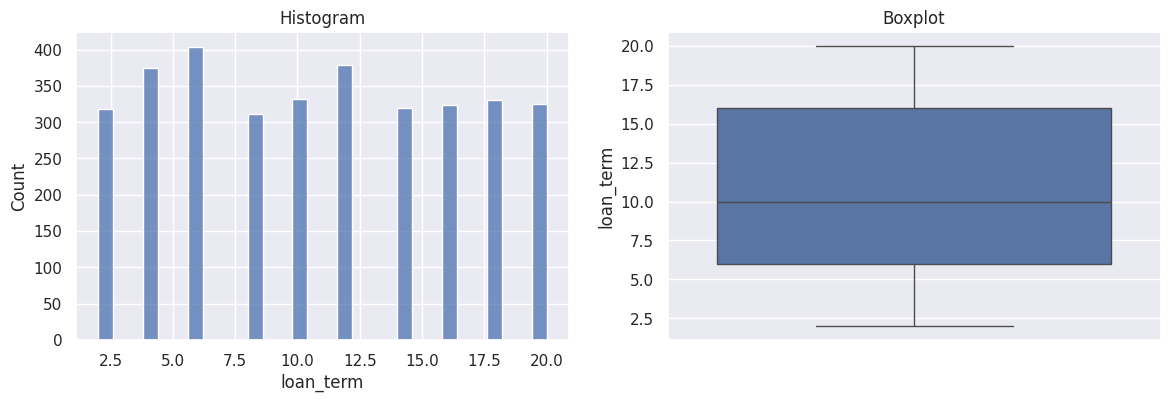

In [50]:
# Cek visualisasi untuk loan_term
diagnostic_plot(X_train, 'loan_term')

**Statement**

Tidak ada outlier yang terlihat dalam grafik, dengan distribusi merata di seluruh grafik.

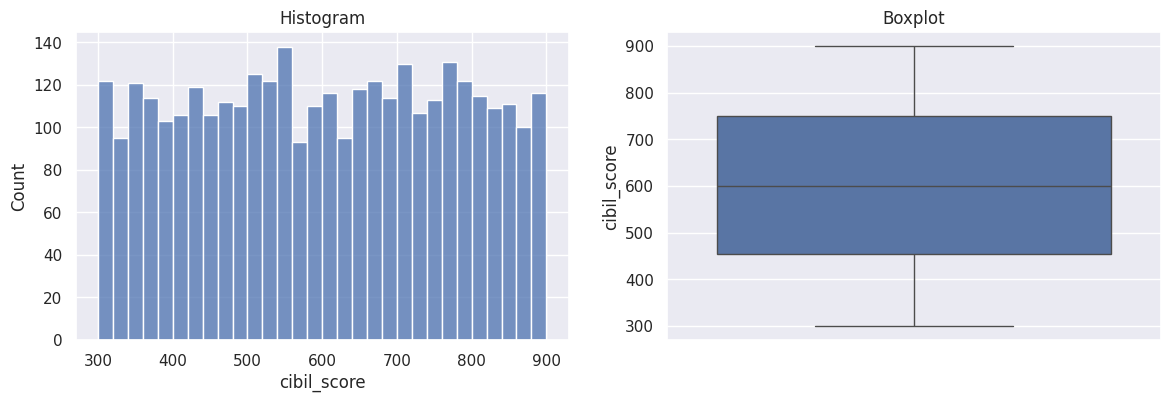

In [51]:
# Cek visualisasi untuk cibil_score
diagnostic_plot(X_train, 'cibil_score')

**Statement**

Mirip dengan `loan_term`, tidak ada outlier yang terlihat di grafik, dan datanya terdistribusi secara merata.

## 5.4- Handling Missing Value

In [52]:
X_train_capped.isnull().sum().sum()

0

In [53]:
X_test.isnull().sum().sum()

0

In [54]:
y_train.isnull().sum()

0

In [55]:
y_test.isnull().sum()

0

**Statement**

Karena tidak ada missing value pada dataset diatas, maka pada bagian ini tidak akan dilakukan handle. Ini merupakan dataset yang sudah bersih dari missing value.

## 5.5- Feature Selection

In [56]:
list(X_train.columns)

['income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'total_asset',
 'condition']

In [57]:
# Split the columns into num_col and cat_col
num_col = X_train_capped.select_dtypes(include=np.number).columns.tolist()
cat_col = X_test.select_dtypes(include=['object']).columns.tolist()

print('Numerical column:', num_col)
print('Categorical column:', cat_col)

Numerical column: ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'total_asset']
Categorical column: ['condition']


In [58]:
# Split train set and test test based on column types
X_train_num = X_train_capped[num_col]
X_test_num = X_test[num_col]

X_train_cat = X_train_capped[cat_col]
X_test_cat = X_test[cat_col]


# Turn the X_train_num into a dataframe
X_train_num_df = pd.DataFrame(X_train_num)
X_test_num_df = pd.DataFrame(X_test_num)

display(X_train_num.head())
display(X_train_cat.head())
display(X_test_num.head())
display(X_test_cat.head())

,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_asset
1534,2.600000e+06,7.900000e+06,12.00000,342.465527,2.000000e+06,2400000.0,7.600000e+06,3300000.0,1.530000e+07
1316,6.100000e+06,1.990000e+07,19.38367,761.000000,4.500000e+06,3700000.0,1.270000e+07,7100000.0,2.800000e+07
934,7.900000e+06,2.876439e+07,4.00000,399.000000,1.714155e+07,5500000.0,2.880474e+07,6900000.0,6.177221e+07
1143,8.899859e+05,1.701141e+06,8.00000,569.000000,2.000000e+05,200000.0,1.582547e+06,300000.0,3.545099e+06
3398,6.900000e+06,2.530000e+07,4.00000,763.000000,9.000000e+06,3600000.0,2.130000e+07,5500000.0,3.940000e+07


,condition
1534,Syarat Terpenuhi
1316,Syarat Terpenuhi
934,Syarat Terpenuhi
1143,Syarat Terpenuhi
3398,Syarat Terpenuhi


,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_asset
1654,7700000,25800000,18,578,5000000,7700000,27200000,10600000,50500000
924,8600000,23600000,2,361,25800000,5300000,24700000,7500000,63300000
42,1400000,3400000,6,540,200000,1500000,3900000,800000,6400000
2497,1700000,4200000,14,829,200000,1600000,4600000,1600000,8000000
1763,2000000,6200000,14,613,100000,1800000,5400000,1300000,8600000


,condition
1654,Syarat Terpenuhi
924,Syarat Terpenuhi
42,Syarat Terpenuhi
2497,Syarat Terpenuhi
1763,Syarat Terpenuhi


## 5.6- Feature Scaling

### 5.6.1- Standard Scaler

In [59]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)


display(X_train_scaled)
display(X_test_scaled)

array([[-0.91740635, -0.83876587,  0.21586753, ..., -0.86384826,
        -0.52972316, -0.92475932],
       [ 0.36813066,  0.58377962,  1.5414781 , ..., -0.26191068,
         0.7637403 , -0.22688748],
       [ 1.02926398,  1.63461315, -1.22039448, ...,  1.63888362,
         0.69566327,  1.62891352],
       ...,
       [ 0.84561584,  1.069816  ,  0.93399854, ...,  0.67050242,
         1.30835649,  0.44900415],
       [ 1.5407252 ,  1.63461315, -1.22039448, ...,  1.26063729,
         1.69863852,  1.22930181],
       [-1.32143227, -1.24182043,  1.29306405, ..., -1.09990221,
        -1.27857043, -1.08411588]])

array([[ 0.95580473,  1.28319783,  1.29306405, ...,  1.44948045,
         1.95508822,  1.00949965],
       [ 1.28637139,  1.02239782, -1.57945999, ...,  1.15441301,
         0.89989434,  1.71286655],
       [-1.3581619 , -1.37222043, -0.86132898, ..., -1.30054806,
        -1.38068596, -1.41381912],
       ...,
       [-1.68872856, -1.53818407,  0.21586753, ..., -1.54840471,
        -1.51684001, -1.56218557],
       [-1.79891745, -1.69229317,  1.29306405, ..., -1.70183978,
        -1.58491704, -1.72703719],
       [ 1.58020842,  1.20021601,  1.65212955, ...,  0.87114827,
         0.35527815,  0.96553922]])

**Statement**

Satndard Scaler digunakan untuk distribusi normal, pada data diatas sudah ditampilkan bahwa nilai yang merata dan seimbang pada batas normalnya.

## 5.7- Feature Encoding

**Statement**

OneHotEncoder digunakan karena pada categorical akan dijadikan binary.

In [60]:
# Encoded target pada data binary
y_train = y_train.replace({'Rejected': 0, 'Approved': 1})
y_test = y_test.replace({'Rejected': 0, 'Approved': 1})
# Encoded target pada data binary
X_train_en = X_train.replace({'Syarat Tidak Terpenuhi': 0, 'Syarat Terpenuhi': 1})
X_test_en = X_test.replace({'Syarat Tidak Terpenuhi': 0, 'Syarat Terpenuhi': 1})

In [61]:
smotenc = SMOTENC([1, 2, 3, 4, 5, 6, 7], k_neighbors= 5, random_state = 42)
X_train_sample, y_train_sample = smotenc.fit_resample(X_train_en, y_train)
y_train_sample.value_counts()

0    2131
1    2131
Name: loan_status, dtype: int64

### 5.8.1- Pipeline

In [62]:
numeric_n = Pipeline([
    ('scaler_n', StandardScaler())
])

numeric_s = Pipeline([
    ('scaler_s', MinMaxScaler())
])

categorical = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


num_col_n = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'luxury_assets_value', 'total_asset']
num_col_s = ['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']
cat_col_n = ['condition']

In [63]:
preprocessor = ColumnTransformer(transformers=[
    ('num_n', numeric_n, num_col_n),
    ('num_s', numeric_s, num_col_s),
    ('cat_col', categorical, cat_col)
])

# 6- Model Definition

## 6.1- Support Vector Machine (SVM)

In [64]:
# Model Training using SVM
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_svm', SVC())
])

## 6.2- K-Nearest Neighbors (KNN)

In [65]:
# Model Training using KNN
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_knn', KNeighborsClassifier())
])

## 6.3- Random Forest Classifier

In [66]:
# Model Training using random forest classifier
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_rf', RandomForestClassifier())
])

## 6.4- Decision Tree Classifier

In [67]:
# Model Training using decision tree clasifier
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_dt', DecisionTreeClassifier())
])

## 6.5- Ada Boost Classifier

In [68]:
# Model Training using ada boost classifier
pipeline_adc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_adc', AdaBoostClassifier())
])

# 7- Model Training

## 7.1- Support Vector Machine (SVM)

In [69]:
# model training Support Vector Machine
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['income_annum',
                                                   'loan_amount', 'loan_term',
                                                   'cibil_score',
                                                   'luxury_assets_value',
                                                   'total_asset']),
                                                 ('num_s',
                                                  Pipeline(steps=[('scaler_s',
                                                                   MinMaxScaler())]),
                                                  ['residential_assets_value',
                                                   'commercial_assets_value',
                                                   'bank_asset_value']),
                                                 ('cat_col',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condition'])])),
                ('classifier_svm', SVC())])

## 7.2- K-Nearest Neighbors (KNN)

In [70]:
# model training KNeighborsClassifier
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['income_annum',
                                                   'loan_amount', 'loan_term',
                                                   'cibil_score',
                                                   'luxury_assets_value',
                                                   'total_asset']),
                                                 ('num_s',
                                                  Pipeline(steps=[('scaler_s',
                                                                   MinMaxScaler())]),
                                                  ['residential_assets_value',
                                                   'commercial_assets_value',
                                                   'bank_asset_value']),
                                                 ('cat_col',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condition'])])),
                ('classifier_knn', KNeighborsClassifier())])

## 7.3- Random Forest Classifier

In [71]:
# model training KNeighborsClassifier
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['income_annum',
                                                   'loan_amount', 'loan_term',
                                                   'cibil_score',
                                                   'luxury_assets_value',
                                                   'total_asset']),
                                                 ('num_s',
                                                  Pipeline(steps=[('scaler_s',
                                                                   MinMaxScaler())]),
                                                  ['residential_assets_value',
                                                   'commercial_assets_value',
                                                   'bank_asset_value']),
                                                 ('cat_col',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condition'])])),
                ('classifier_rf', RandomForestClassifier())])

## 7.4- Decision Tree CLassifier

In [72]:
# model training decision tree
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['income_annum',
                                                   'loan_amount', 'loan_term',
                                                   'cibil_score',
                                                   'luxury_assets_value',
                                                   'total_asset']),
                                                 ('num_s',
                                                  Pipeline(steps=[('scaler_s',
                                                                   MinMaxScaler())]),
                                                  ['residential_assets_value',
                                                   'commercial_assets_value',
                                                   'bank_asset_value']),
                                                 ('cat_col',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condition'])])),
                ('classifier_dt', DecisionTreeClassifier())])

## 7.5- Ada Booster Classifier

In [73]:
# model training ada boost classifier
pipeline_adc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['income_annum',
                                                   'loan_amount', 'loan_term',
                                                   'cibil_score',
                                                   'luxury_assets_value',
                                                   'total_asset']),
                                                 ('num_s',
                                                  Pipeline(steps=[('scaler_s',
                                                                   MinMaxScaler())]),
                                                  ['residential_assets_value',
                                                   'commercial_assets_value',
                                                   'bank_asset_value']),
                                                 ('cat_col',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condition'])])),
                ('classifier_adc', AdaBoostClassifier())])

# 8- Model Evaluation

> pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. hal ini harus dibuktikan dengan visualisasi performa dan/atau tingkat kesalahan model. Lakukkan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## 8.1- Support Vector Machine (SVM)

In [74]:
y_pred_train_svm = pipeline_svm.predict(X_train)
y_pred_test_svm = pipeline_svm.predict(X_test)

In [75]:
# Model Evaluation - Train Set & Test Set
print(classification_report(y_train, y_pred_train_svm))
print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1284
           1       0.97      0.96      0.97      2131

    accuracy                           0.96      3415
   macro avg       0.95      0.96      0.96      3415
weighted avg       0.96      0.96      0.96      3415

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       329
           1       0.97      0.97      0.97       525

    accuracy                           0.96       854
   macro avg       0.96      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



## 8.2- K-Nearest Neighbors (KNN)

In [76]:
# Model Prediction

y_pred_train_knn = pipeline_knn.predict(X_train)
y_pred_test_knn = pipeline_knn.predict(X_test)

In [77]:
# Model Evaluation - Train Set & Test Set
print(classification_report(y_train, y_pred_train_knn))
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1284
           1       0.97      0.98      0.97      2131

    accuracy                           0.97      3415
   macro avg       0.97      0.97      0.97      3415
weighted avg       0.97      0.97      0.97      3415

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       329
           1       0.94      0.97      0.96       525

    accuracy                           0.95       854
   macro avg       0.95      0.94      0.94       854
weighted avg       0.95      0.95      0.95       854



## 8.3- Random Forest Classifier

In [78]:
# Model Prediction

y_pred_train_rfc = pipeline_rf.predict(X_train)
y_pred_test_rfc = pipeline_rf.predict(X_test)

In [79]:
# Model Evaluation - Train Set & Test Set
print(classification_report(y_train, y_pred_train_rfc))
print(classification_report(y_test, y_pred_test_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1284
           1       1.00      1.00      1.00      2131

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       329
           1       0.99      0.98      0.99       525

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



## 8.4- Decision Tree Classifier

In [80]:
# Model Prediction

y_pred_train_dt = pipeline_dt.predict(X_train)
y_pred_test_dt = pipeline_dt.predict(X_test)

In [81]:
# Model Evaluation - Train Set & Test Set
print(classification_report(y_train, y_pred_train_dt))
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1284
           1       1.00      1.00      1.00      2131

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       329
           1       0.98      0.98      0.98       525

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



## 8.5- Ada Boost Classifier

In [82]:
# Model Prediction

y_pred_train_adc = pipeline_adc.predict(X_train)
y_pred_test_adc = pipeline_adc.predict(X_test)

In [83]:
# Model Evaluation - Train Set & Test Set
print(classification_report(y_train, y_pred_train_adc))
print(classification_report(y_test, y_pred_test_adc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1284
           1       0.99      0.99      0.99      2131

    accuracy                           0.99      3415
   macro avg       0.99      0.99      0.99      3415
weighted avg       0.99      0.99      0.99      3415

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       329
           1       0.99      0.99      0.99       525

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



**STATEMENT**

**MODEL EVALUATION**

**Support Vector Machine (SVM)**

- Dapat dilihat dari nilai prediction yang dilakukan dengan model Support Vector Machine (SVM) mendapatkan nilai precision 0.90 untuk X_train dan X_test nya mendapatkan nilai 0.99. Untuk prediction dengan recall mendapatkan nilai 0.98 untuk X_train dan untuk X_test nya mendapatkan nilai 0.94, sedangkan untuk F1-score mendapatkan nilai 0.94 untuk nilai X_train dan untuk X_test mendapatkan nilai 0.96.

**K-Nearest Neighbors**

- Dapat dilihat dari nilai prediction yang dilakukan dengan model K-Nearest Neighbors mendapatkan nilai precision 0.94 untuk X_train dan X_test nya mendapatkan nilai 0.99. Untuk prediction dengan recall mendapatkan nilai 0.98 untuk X_train dan untuk X_test nya mendapatkan nilai 0.96, sedangkan untuk F1-score mendapatkan nilai 0.96 untuk nilai X_train dan untuk X_test mendapatkan nilai 0.97.

**Random Forest Classifier**

- Dapat dilihat dari nilai prediction yang dilakukan dengan model Random Forest Classifier mendapatkan nilai precision 1.00 untuk X_train dan X_test nya mendapatkan nilai 1.00. Untuk prediction dengan recall mendapatkan nilai 1.00 untuk X_train dan untuk X_test nya mendapatkan nilai 1.00, sedangkan untuk F1-score mendapatkan nilai 1.00 untuk nilai X_train dan untuk X_test mendapatkan nilai 1.00.

**Decision Tree**

- Dapat dilihat dari nilai prediction yang dilakukan dengan model Decision Tree mendapatkan nilai precision 1.00 untuk X_train dan X_test nya mendapatkan nilai 1.00. Untuk prediction dengan recall mendapatkan nilai 1.00 untuk X_train dan untuk X_test nya mendapatkan nilai 1.00, sedangkan untuk F1-score mendapatkan nilai 1.00 untuk nilai X_train dan untuk X_test mendapatkan nilai 1.00.

**Ada Boost Classifier**

- Dapat dilihat dari nilai prediction yang dilakukan dengan model Ada Boost Classifier mendapatkan nilai precision 0.96 untuk X_train dan X_test nya mendapatkan nilai 1.00. Untuk prediction dengan recall mendapatkan nilai 0.99 untuk X_train dan untuk X_test nya mendapatkan nilai 0.97, sedangkan untuk F1-score mendapatkan nilai 0.97 untuk nilai X_train dan untuk X_test mendapatkan nilai 0.98.

# 9- Model Improvement

## 9.1- Baseline Model

In [84]:
# Define skfold
skfold = StratifiedKFold(n_splits=5)

In [85]:
# Define Cross Validation (score) for each model
cv_svm_model = cross_val_score(pipeline_svm, X_train, y_train, cv=skfold, scoring='f1')
cv_knn_model = cross_val_score(pipeline_knn, X_train, y_train, cv=skfold, scoring='f1')
cv_rf_model = cross_val_score(pipeline_rf, X_train, y_train, cv=skfold, scoring='f1')
cv_dt_model = cross_val_score(pipeline_dt, X_train, y_train, cv=skfold, scoring='f1')
cv_adc_model = cross_val_score(pipeline_adc, X_train, y_train, cv=skfold, scoring='f1')

In [86]:
# Finding best model based on Cross_Val_score (mean)
name_model = []
cv_scores = 0
for cv, name in zip([cv_svm_model, cv_knn_model, cv_rf_model, cv_dt_model, cv_adc_model],
                    ['pipeline_svm', 'pipeline_knn', 'pipeline_rf', 'pipeline_dt', 'adc_model']):
  print(name)
  print('f1score - All - Cross Validation: ', cv)
  print('f1score - Mean - Cross Validation: ', cv.mean())
  print('f1score - Std - Cross Validation: ', cv.std())
  print('f1score - Range of Test Set: ', (cv.mean()-cv.std()), '-', (cv.mean()+cv.std()))
  print('-'*50)
  if cv.mean() > cv_scores:
    cv_scores = cv.mean()
    name_model = name
  else:
    pass
print('Best Model: ', name_model)
print('Cross Val Mean from Best Model: ', cv_scores)

pipeline_svm
f1score - All - Cross Validation:  [0.96933962 0.97411765 0.94575472 0.95867769 0.95260664]
f1score - Mean - Cross Validation:  0.9600992615405938
f1score - Std - Cross Validation:  0.01044821222029411
f1score - Range of Test Set:  0.9496510493202996 - 0.9705474737608879
--------------------------------------------------
pipeline_knn
f1score - All - Cross Validation:  [0.97069168 0.95813953 0.93706294 0.94674556 0.95227008]
f1score - Mean - Cross Validation:  0.9529819584006096
f1score - Std - Cross Validation:  0.011252105186167044
f1score - Range of Test Set:  0.9417298532144426 - 0.9642340635867767
--------------------------------------------------
pipeline_rf
f1score - All - Cross Validation:  [0.98352941 0.98598131 0.97777778 0.98598131 0.97892272]
f1score - Mean - Cross Validation:  0.9824385045985096
f1score - Std - Cross Validation:  0.003474942753759666
f1score - Range of Test Set:  0.9789635618447499 - 0.9859134473522693
------------------------------------------

In [87]:
# Cross Validation using `cross_val_score`

f1_train_cross_val = cross_val_score(pipeline_dt,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('f1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('f1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('f1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('f1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

f1 Score - All - Cross Validation  :  [0.98235709 0.98397213 0.98235709]
f1 Score - Mean - Cross Validation :  0.982895436777737
f1 Score - Std - Cross Validation  :  0.0007613338511591754
f1 Score - Range of Test-Set       :  0.9821341029265779 - 0.9836567706288962


## 9.2- Hypermeter Tuning

In [88]:
X_train_sample.shape

(4262, 10)

In [89]:
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_search_params = {'classifier_dt__criterion': ['gini'],
                        'classifier_dt__max_depth':max_depth,
                        'classifier_dt__min_samples_split':min_samples_split,
                        'classifier_dt__min_samples_leaf':min_samples_leaf}
# Create a GridSearchCV object
grid_dt = GridSearchCV(pipeline_dt, param_grid=random_search_params,verbose=3,refit=True,scoring ='recall', cv=5, return_train_score=True, n_jobs=2)

# Fit the GridSearchCV object to the training data
grid_dt.fit(X_train, y_train) # INI X_train doang

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", grid_dt.best_params_)
print("Best Precision score:", grid_dt.best_score_)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters: {'classifier_dt__criterion': 'gini', 'classifier_dt__max_depth': 560, 'classifier_dt__min_samples_leaf': 6, 'classifier_dt__min_samples_split': 14}
Best Precision score: 0.9873305406207737


In [90]:
# Get Best Estimator
dt_gridcv_best = grid_dt.best_estimator_

In [91]:
test = dt_gridcv_best.predict(X_train)

F1 Score - Train Set  :  0.9924776680771038 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1284
           1       0.99      0.99      0.99      2131

    accuracy                           0.99      3415
   macro avg       0.99      0.99      0.99      3415
weighted avg       0.99      0.99      0.99      3415
 

Confusion Matrix      : 


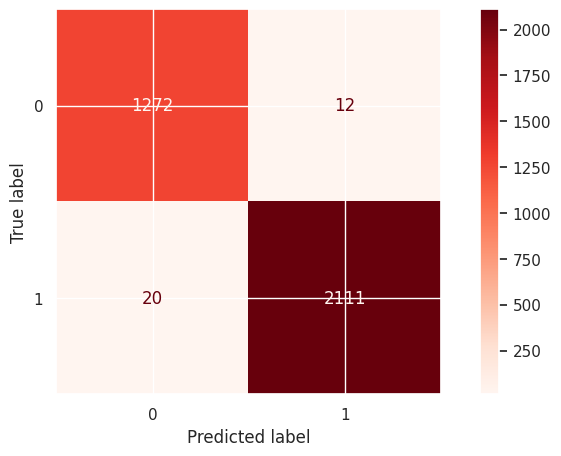

In [93]:
# Check Performance Model against Train-Set

y_pred_train_sample = dt_gridcv_best.predict(X_train)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_sample), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_sample), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_gridcv_best, X_train, y_train, cmap='Reds'))

**Statement**

Hasil di atas menunjukkan skor yang sangat baik untuk presisi, recall, f1, dan akurasi. Semua nilai adalah 99% atau 98%. Ini bisa berarti model yang dilatih benar-benar bagus, atau kebetulan pandai menebak. Terdapat 2114 nilai yang termasuk dalam True Negative, 17 nilai termasuk dalam False Positive, 34 nilai dalam False Negative, dan 2097 nilai dalam True Positive.

F1 Score - Test Set   :  0.9846449136276392 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       329
           1       0.99      0.98      0.98       525

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854
 

Confusion Matrix      : 


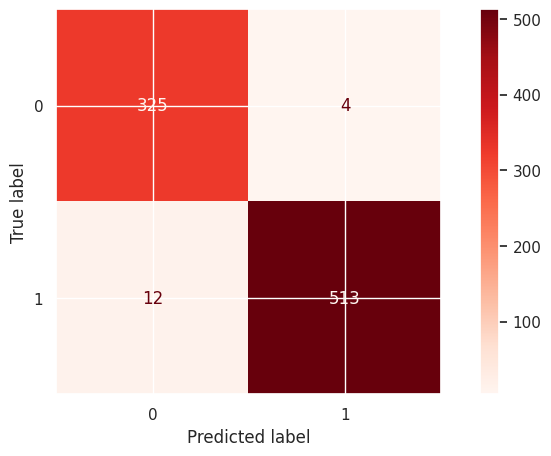

In [94]:
# Check Performance Model against Test-Set

y_pred_test_sample = dt_gridcv_best.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_sample), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_sample), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_gridcv_best, X_test, y_test, cmap='Reds'))

**Statement**

Hasil di atas menunjukkan skor yang sangat baik untuk presisi, recall, f1, dan akurasi. Semua nilai adalah 99% atau 97%. Ini bisa berarti model yang dilatih benar-benar bagus, atau kebetulan pandai menebak. Terdapat 325 nilai yang termasuk dalam True Negative, 4 nilai termasuk dalam False Positive, 12 nilai dalam False Negative, dan 5513 nilai dalam True Positive.

# 10- Model Analysis

**STATEMENT**

**Random Forest Classifier**

- Dapat dilihat dari nilai prediction yang dilakukan dengan model Random Forest Classifier mendapatkan nilai precision 0.99 untuk X_train dan X_test nya mendapatkan nilai 0.97. Untuk prediction dengan recall mendapatkan nilai 0.98 untuk X_train dan untuk X_test nya mendapatkan nilai 0.98, sedangkan untuk F1-score mendapatkan nilai 0.98 untuk nilai X_train dan untuk X_test mendapatkan nilai 0.97.

**Decision Tree**

- Dapat dilihat dari nilai prediction yang dilakukan dengan model Decision Tree mendapatkan nilai precision 0.99 untuk X_train dan X_test nya mendapatkan nilai 0.97. Untuk prediction dengan recall mendapatkan nilai 0.98 untuk X_train dan untuk X_test nya mendapatkan nilai 0.99, sedangkan untuk F1-score mendapatkan nilai 0.99 untuk nilai X_train dan untuk X_test mendapatkan nilai 0.98.


# 11- Model Inference

In [95]:
# Save the files

with open("dt_gridcv_best.pkl", "wb") as file_1:
   pickle.dump(dt_gridcv_best, file_1)


In [96]:
X_train.shape

(3415, 10)

In [97]:
y_pred = dt_gridcv_best.predict(X_train) # Jalankan model
y_pred # hasil dari model

array([0, 1, 1, ..., 1, 1, 0])

# 12- Kesimpulan

**Kesimpulan :**

1.	Penjelasan macam-macam hasil model evaluasi dan interpretasi
Dari perbandingan kelima model evaluasi pada nilai yang menggunakan model **Support Vector Machine**, **K-Nearest Neighbors**, **Random Forest Classifier**, **Decision Tree Classifier**, **Ada Boost Classifier**. Dari kelima model ini memiliki nilai prediksi diatas 90% lebih, dari kelimanya yang paling mendekati nilai 100% ada lah model **Decision Tree Classifier**.

2.	Improvement
Menemukan model yang cukup tepat untuk mendukung model yang lebih bagus, memberikan parameter cukup lumayan untuk menambahkan beberapa persen kenaikan hasil prediksi.

4	Insight EDA
-	Saat melakukan eksplorasi data pertama di kolom target hasilnya bahwa hanya beberapa kolom saja yang memiliki korelasi dengan kolom `paymen_next_month`.
-	Pada saat melakukan eksplorasi data kedua pada kolom numerical untuk melihat sebaran datanya dari visualisasi histogram, terdapat frekuensi pada pay_0 dan pay_1 mempunyai frekuensi tertinggi pada limit balance 10000 – 500000 yang paling banyak.
-	Pada saat melaukan eksplorasi data ketiga pada kolom categorical untuk melihat nilai semua pay mempunyai outlier yang cukup banyak apa tidak, karena outlier tidak didrop karena ada kemungkinan nilai outlier dapat mepengaruhi hasilnya.



In [98]:
df[:5].to_dict()

{'loan_id': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5},
 'no_of_dependents': {0: 2, 1: 0, 2: 3, 3: 3, 4: 5},
 'education': {0: 'Graduate',
  1: 'Not Graduate',
  2: 'Graduate',
  3: 'Graduate',
  4: 'Not Graduate'},
 'self_employed': {0: 'No', 1: 'Yes', 2: 'No', 3: 'No', 4: 'Yes'},
 'income_annum': {0: 9600000, 1: 4100000, 2: 9100000, 3: 8200000, 4: 9800000},
 'loan_amount': {0: 29900000,
  1: 12200000,
  2: 29700000,
  3: 30700000,
  4: 24200000},
 'loan_term': {0: 12, 1: 8, 2: 20, 3: 8, 4: 20},
 'cibil_score': {0: 778, 1: 417, 2: 506, 3: 467, 4: 382},
 'residential_assets_value': {0: 2400000,
  1: 2700000,
  2: 7100000,
  3: 18200000,
  4: 12400000},
 'commercial_assets_value': {0: 17600000,
  1: 2200000,
  2: 4500000,
  3: 3300000,
  4: 8200000},
 'luxury_assets_value': {0: 22700000,
  1: 8800000,
  2: 33300000,
  3: 23300000,
  4: 29400000},
 'bank_asset_value': {0: 8000000,
  1: 3300000,
  2: 12800000,
  3: 7900000,
  4: 5000000},
 'loan_status': {0: 'Approved',
  1: 'Rejected',
  2: 'Rejecte

# 13- Conceptual Problem

**1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !**
  - Bagging adalah teknik yang berasal dari pembelajaran ansambel untuk meningkatkan model/algoritma melalui akurasi dan kinerja/ Ini membantu mengurangi varians model, yang digunakan untuk memerangi bias dalam varians. Hal ini dapat menghindari overfitting yang penting dalam penggunaan model pembelajaran mesin. Bagging bekerja melalui pemilihan fitur secara acak untuk sampel observasi, kemudian subset fitur terbaik akan dipilih untuk membagi fitur, dimana langkah tersebut diulangi beberapa kali untuk membantu pohon keputusan memberikan prediksi terbaik.
  
**2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !**
       
 - Algoritme Random Forest bekerja melalui data yang digeneralisasi, yang mengambil contoh individual dan memilih pihak mayoritas dari kumpulan data terdekat. Random Forest juga terdiri dari algoritma pohon keputusan, yang lebih rentan terhadap overfitting. AdaBoost merupakan algoritma yang dipilih karena menggunakan berbagai algoritma klasifikasi yang dapat mengklasifikasikan data melalui kombinasi pembelajar yang lemah, seperti pohon keputusan, dan menjadikannya menjadi pembelajar yang kuat. Ini membantu kinerja masalah klasifikasi pohon keputusan.

**3.   Jelaskan apa yang dimaksud dengan Cross Validation !**

 - Cross-validation adalah sebuah teknik yang digunakan dalam machine learning untuk mengevaluasi kinerja model secara objektif. Tujuannya adalah untuk memahami seberapa baik model akan berperforma pada data yang belum pernah dilihat sebelumnya. Dalam cross-validation, data dibagi menjadi beberapa subset (fold) dan model dilatih serta diuji beberapa kali menggunakan kombinasi berbeda dari subset tersebut.

Keuntungan : Menghindari Overfitting, Evaluasi yang Stabil, Pemilihan Model yang Optimal.